In [1]:
import sys
import json
import matplotlib.pyplot as plt

sys.path.append("..")

In [2]:
from src.cipher_utils import encode, create_encrytpion_dict
from src.corpus_utils import get_letter_frequencies
from src.mcmc import cross_validation, eval_solutions, eval_close_solutions

In [ ]:
text = "Whiskers was no ordinary cat he believed he was a pirate. Each morning, he climbed the tallest shelf in the house, meowed like a captain, and batted down anything in his path. One day, he discovered a crumpled treasure map under the rug. Tail high, he followed it through the garden, under the fence, and into the neighbors shed. There, among dusty boxes, he found his prize: a forgotten box of tuna. He purred victoriously, the fearless feline captain of Tuna Island.".lower()
print(f"Text length: {len(text)}")

In [4]:
with open("../data/en_perc_dict.json") as file:
    perc_dict = json.load(file)

with open("../data/en_corpus.txt") as file:
    corpus = file.read().lower()

encryption_dict = create_encrytpion_dict()
encoded_text = encode(text, encryption_dict)
attempts = 50
iters = 25000

In [5]:
print("Original text:\n")
print(text)
print("\nEncoded text:\n")
print(encoded_text)

Original text:

whiskers was no ordinary cat he believed he was a pirate. each morning, he climbed the tallest shelf in the house, meowed like a captain, and batted down anything in his path. one day, he discovered a crumpled treasure map under the rug. tail high, he followed it through the garden, under the fence, and into the neighbors shed. there, among dusty boxes, he found his prize: a forgotten box of tuna. he purred victoriously, the fearless feline captain of tuna island.

Encoded text:

nqoasybakn8akdckcbrod8bhkz8 kqyklyeoyfyrkqykn8ak8k3ob8 y2ky8zqkwcbdod56kqykzeowlyrk qyk 8eeya kaqye?kodk qykqc:ay6kwycnyrkeosyk8kz83 8od6k8drkl8  yrkrcndk8dh qod5kodkqoak38 q2kcdykr8h6kqykroazcfybyrk8kzb:w3eyrk by8a:bykw83k:drybk qykb:52k 8oekqo5q6kqyk?ceecnyrko k qbc:5qk qyk58bryd6k:drybk qyk?ydzy6k8drkod ck qykdyo5qlcbakaqyr2k qyby6k8wcd5kr:a hklctya6kqyk?c:drkqoak3bo7ygk8k?cb5c  ydklctkc?k :d82kqyk3:bbyrkfoz cboc:aeh6k qyk?y8beyaak?yeodykz83 8odkc?k :d8koae8dr2


In [6]:
corpus_letters, corpus_frequencies = get_letter_frequencies(corpus)
text_letters, text_frequencies = get_letter_frequencies(encoded_text)

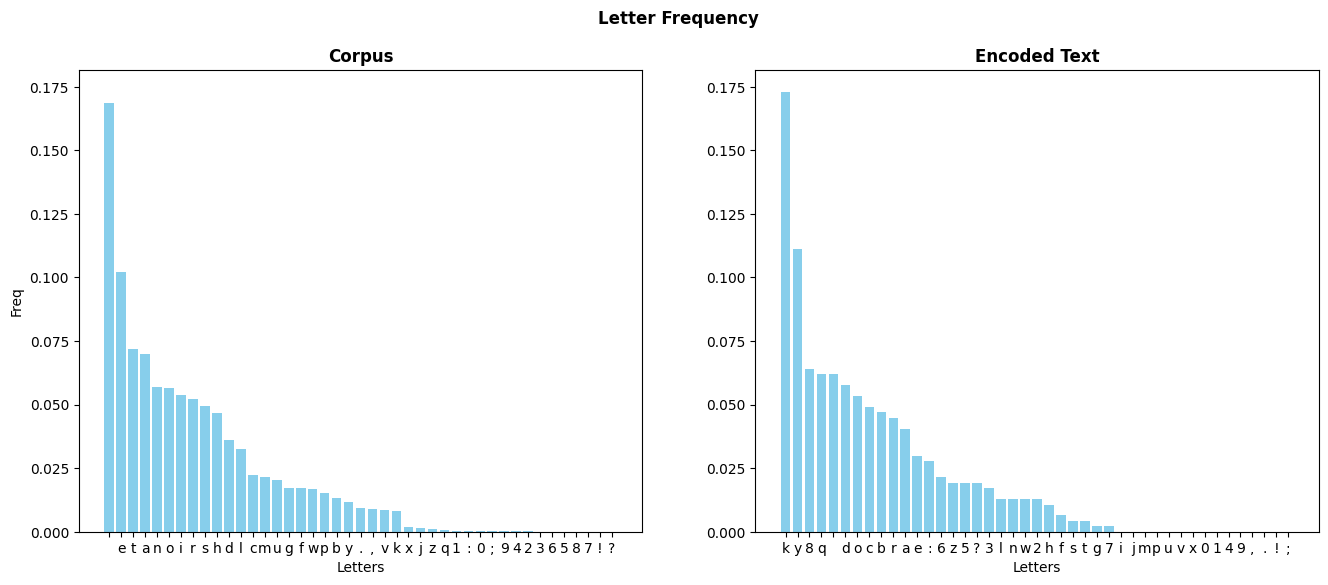

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle("Letter Frequency", fontweight="bold")

ax1.bar(corpus_letters, corpus_frequencies, color="skyblue")
ax1.set_xlabel("Letters")
ax1.set_ylabel("Freq")
ax1.set_title("Corpus", fontweight="bold")

ax2.bar(text_letters, text_frequencies, color="skyblue")
ax2.set_xlabel("Letters")
ax2.set_title("Encoded Text", fontweight="bold")
ax2.tick_params(labelleft=True)

plt.show()

We ary trying to improve the algorithm by specifying starting encryption dict. In default implementation the random one is used. Here we suppose that letters with high frequencies in encoded text were originally letters with high frequencies in corpus.

In [8]:
freq_based_encryption_dict = {corpus_letters[i]: text_letters[i] for i in range(len(corpus_letters))}
print(freq_based_encryption_dict)

{' ': 'k', 'e': 'y', 't': '8', 'a': 'q', 'n': ' ', 'o': 'd', 'i': 'o', 'r': 'c', 's': 'b', 'h': 'r', 'd': 'a', 'l': 'e', 'c': ':', 'm': '6', 'u': 'z', 'g': '5', 'f': '?', 'w': '3', 'p': 'l', 'b': 'n', 'y': 'w', '.': '2', ',': 'h', 'v': 'f', 'k': 's', 'x': 't', 'j': 'g', 'z': '7', 'q': 'i', '1': 'j', ':': 'm', '0': 'p', ';': 'u', '9': 'v', '4': 'x', '2': '0', '3': '1', '6': '4', '5': '9', '8': ',', '7': '.', '!': '!', '?': ';'}


In [9]:
all_samples, all_scores = cross_validation(attempts, encoded_text, perc_dict, iters)
all_samples_freq, all_scores_freq = cross_validation(attempts, encoded_text, perc_dict, iters, encryption_dict=freq_based_encryption_dict)

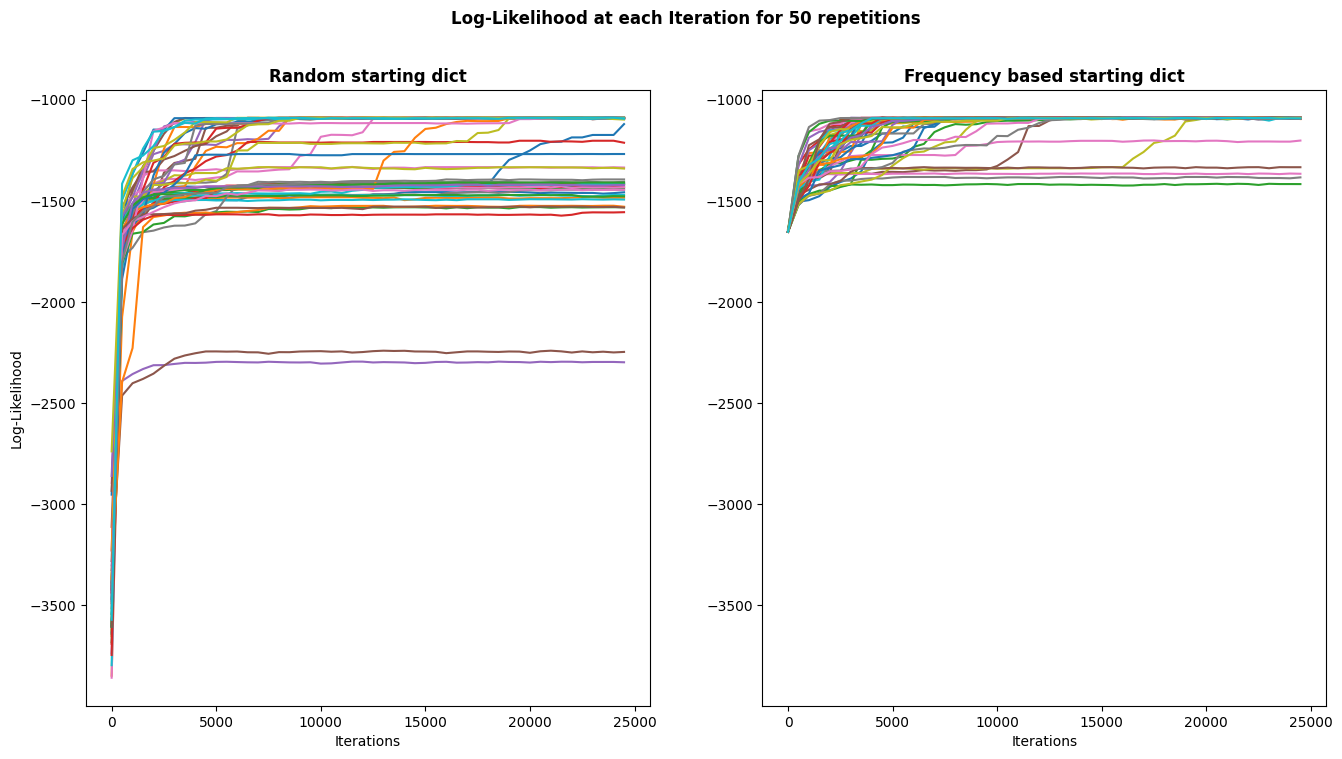

In [10]:
range_iters = list(range(0, iters, 500))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
fig.suptitle(f"Log-Likelihood at each Iteration for {attempts} repetitions", fontweight="bold")

ax1.set_xlabel("Iterations")
ax1.set_ylabel("Log-Likelihood")
ax1.set_title("Random starting dict", fontweight="bold")
for i in range(len(all_scores)):
    ax1.plot(range_iters, all_scores[i])

ax2.set_xlabel("Iterations")
ax2.set_title("Frequency based starting dict", fontweight="bold")
ax2.tick_params(labelleft=True)
for i in range(len(all_scores_freq)):
    ax2.plot(range_iters, all_scores_freq[i])


plt.show()

In [14]:
correct_decoding_ratio = eval_solutions(text, all_samples)
correct_decoding_ratio_freq = eval_solutions(text, all_samples_freq)
close_decoding_ratio = eval_close_solutions(text, all_samples, perc_dict)
close_decoding_ratio_freq = eval_close_solutions(text, all_samples_freq, perc_dict)

In [16]:
print("Evaluation:\n")
print(f"For {attempts} attempts with {iters} iterations each algorithm with random starting encryption dict found the correct solution with {correct_decoding_ratio} success ratio and close solution with {close_decoding_ratio} success ratio.")
print(f"For {attempts} attempts with {iters} iterations each algorithm with freq based starting dict found the correct solution with {correct_decoding_ratio_freq} success ratio and close solution with {close_decoding_ratio_freq} success ratio.")

Evaluation:

For 50 attempts with 25000 iterations each algorithm with random starting encryption dict found the correct solution with 0.06 success ratio and close solution with 0.46 success ratio.
For 50 attempts with 25000 iterations each algorithm with freq based starting dict found the correct solution with 0.14 success ratio and close solution with 0.9 success ratio.
